<a href="https://colab.research.google.com/github/amitverma7426/DataScience/blob/main/Data_Analytics_for_insurance_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import piplite
await piplite.install('seaborn')

ModuleNotFoundError: No module named 'piplite'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [ ]:
df

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [ ]:
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [ ]:
df = pd.read_csv(filepath, header=None)
print(df.head(10))


    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [ ]:
headers = ["Age", "Gender", "bmi", "no_of_children", "Smoker", "region", "chargers"]
print("headers", headers)

headers ['Age', 'Gender', 'bmi', 'no_of_children', 'Smoker', 'region', 'chargers']


In [ ]:
df.columns = headers
df.columns

Index(['Age', 'Gender', 'bmi', 'no_of_children', 'Smoker', 'region',
       'chargers'],
      dtype='object')

In [ ]:
df

,Age,Gender,bmi,no_of_children,Smoker,region,chargers
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [ ]:
df1 = df.replace("?", np.nan, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2768 non-null   object 
 1   Gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   Smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   chargers        2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
mean = df["Age"].astype('float').mean(axis=0)
df["Age"].replace(np.nan, mean, inplace= True)

In [ ]:
df

,Age,Gender,bmi,no_of_children,Smoker,region,chargers
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [ ]:
is_smoker = df['Smoker'].value_counts().idxmax()
df["Smoker"].replace(np.nan, is_smoker , inplace = True)

In [ ]:
df

,Age,Gender,bmi,no_of_children,Smoker,region,chargers
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [ ]:
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype('int')

In [ ]:
df["Age"].dtype
df["Smoker"].dtype

dtype('int64')

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   int64  
 1   Gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   Smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   chargers        2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In [ ]:
df[["chargers"]] = np.round(df[["chargers"]],2)

In [ ]:
df

,Age,Gender,bmi,no_of_children,Smoker,region,chargers
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86
2768,21,1,34.600,0,0,3,2020.18
2769,19,2,26.030,1,1,1,16450.89
2770,23,2,18.715,0,0,1,21595.38


<Axes: xlabel='chargers', ylabel='bmi'>

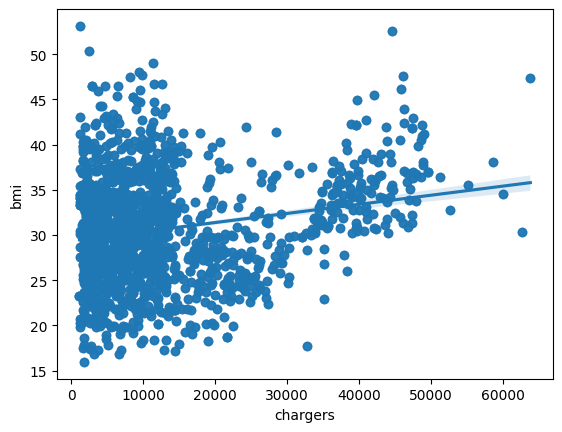

In [ ]:
sns.regplot(x = "chargers", y = "bmi", data =df)
#plt.ylim(0,)
#sns.regplot(x="bmi", y="chargers", data=df, line_kws={"color": "red"})
#plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='chargers'>

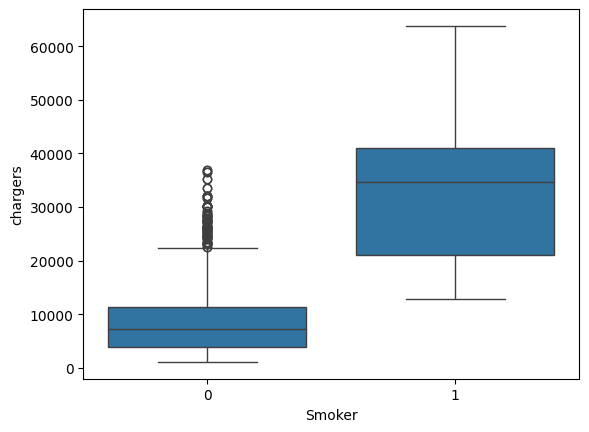

In [ ]:
sns.boxplot(x="Smoker", y="chargers", data=df)


In [ ]:
print(df.corr())


                     Age    Gender       bmi  no_of_children    Smoker  \
Age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
Gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
Smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
chargers        0.298624  0.062837  0.199846        0.066442  0.788783   

                  region  chargers  
Age            -0.007167  0.298624  
Gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
Smoker          0.054077  0.788783  
region          1.000000  0.054058  
chargers        0.054058  1.000000  


In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
x = df[["chargers"]]
y = df[["Smoker"]]

In [ ]:
lm.fit(x,y)

LinearRegression()

In [ ]:
print(lm.score(x, y))


0.6221791733924185


In [ ]:
yhat = lm.predict(x)

In [ ]:
yhat


array([[ 0.29816903],
       [-0.09803929],
       [-0.02684664],
       ...,
       [ 0.28682514],
       [ 0.42128256],
       [ 0.1143142 ]])

In [81]:
# definition of Y and lm remain same as used in last cell.
Z = df[["Age", "Gender", "bmi", "no_of_children", "Smoker", "region"]]
lm.fit(Z,y)
print(lm.score(Z, y))

1.0


In [93]:
# Y and Z use the same values as defined in previous cells
#Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
#pipe=Pipeline(Input)
#Z = Z.astype(float)
#pipe.fit(Z,y)
#ypipe=pipe.predict(Z)
#print(r2_score(y,ypi
Pipeline = Pipeline([
    ('scale',StandardScaler()),
     ('polynomial', PolynomialFeatures(include_bias=False)),
     ('model', LinearRegression())
])
Pipeline.fit(Z,y)
predictions = Pipeline.predict(Z)

TypeError: 'Pipeline' object is not callable

In [86]:
predictions

array([[1.00000000e+00],
       [1.73472348e-15],
       [1.66533454e-15],
       ...,
       [1.00000000e+00],
       [1.08940634e-15],
       [1.65145675e-15]])

In [94]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=1)

In [95]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.9999999232911883


In [96]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.9999992190341876


In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming X_train and X_test are your training and testing subsets of features respectively
# Assuming y_train and y_test are your corresponding training and testing subsets of target variables respectively

# Create PolynomialFeatures object with degree=2
poly = PolynomialFeatures(degree=2)

# Fit and transform the training features
x_train_poly = poly.fit_transform(x_train)

# Transform the testing features
x_test_poly = poly.transform(x_test)

# Initialize and fit Linear Regression model
regressor_poly = LinearRegression()
regressor_poly.fit(x_train_poly, y_train)

# Predict on the testing subset
y_pred_poly = regressor_poly.predict(x_test_poly)

# Calculate R-squared score for the testing subset
r2_score_poly = r2_score(y_test, y_pred_poly)

print("R-squared score for testing subset with polynomial transformation:", r2_score_poly)


R-squared score for testing subset with polynomial transformation: 1.0
